In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
renderer = 'png' # for interactive charts, change to plotly_mimetype or notebook

In [2]:
import pandas as pd
from order_flow_ticks import OrderFlowTicks

df_ticks = pd.read_parquet(f"data/US30_T1_2025_cT.parquet")
df_ticks.rename(columns={'bid': 'close'}, inplace=True)

df_ticks.head(3)
df_ticks.tail(3)
len(df_ticks)

,ask,close,spread
datetime,,,
2025-05-15 00:00:00.650,41839.4,41838.3,1.1
2025-05-15 00:00:01.002,41839.8,41838.7,1.1
2025-05-15 00:00:01.252,41840.2,41839.1,1.1


,ask,close,spread
datetime,,,
2025-05-16 20:54:59.640,42376.7,42375.6,1.1
2025-05-16 20:54:59.841,42377.1,42376.0,1.1
2025-05-16 20:55:00.000,42377.9,42376.8,1.1


180399

In [3]:
df_ohlc = pd.read_parquet(f"data/US30_1Minute_2025_cT.parquet")
df_ohlc = df_ohlc.resample('15min').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum'
})
df_ohlc.head(3)
df_ohlc.tail(3)
len(df_ohlc)

,open,high,low,close,volume
datetime,,,,,
2025-05-15 00:00:00,41838.7,41869.2,41833.8,41862.0,884.0
2025-05-15 00:15:00,41862.3,41873.9,41851.5,41866.7,753.0
2025-05-15 00:30:00,41866.0,41891.2,41863.6,41890.7,719.0


,open,high,low,close,volume
datetime,,,,,
2025-05-16 20:15:00,42601.5,42607.2,42594.2,42602.5,427.0
2025-05-16 20:30:00,42602.4,42606.3,42576.5,42590.0,420.0
2025-05-16 20:45:00,42589.9,42589.9,42371.4,42376.0,1983.0


180

In [4]:
odft = OrderFlowTicks(df_ohlc, df_ticks, 3)

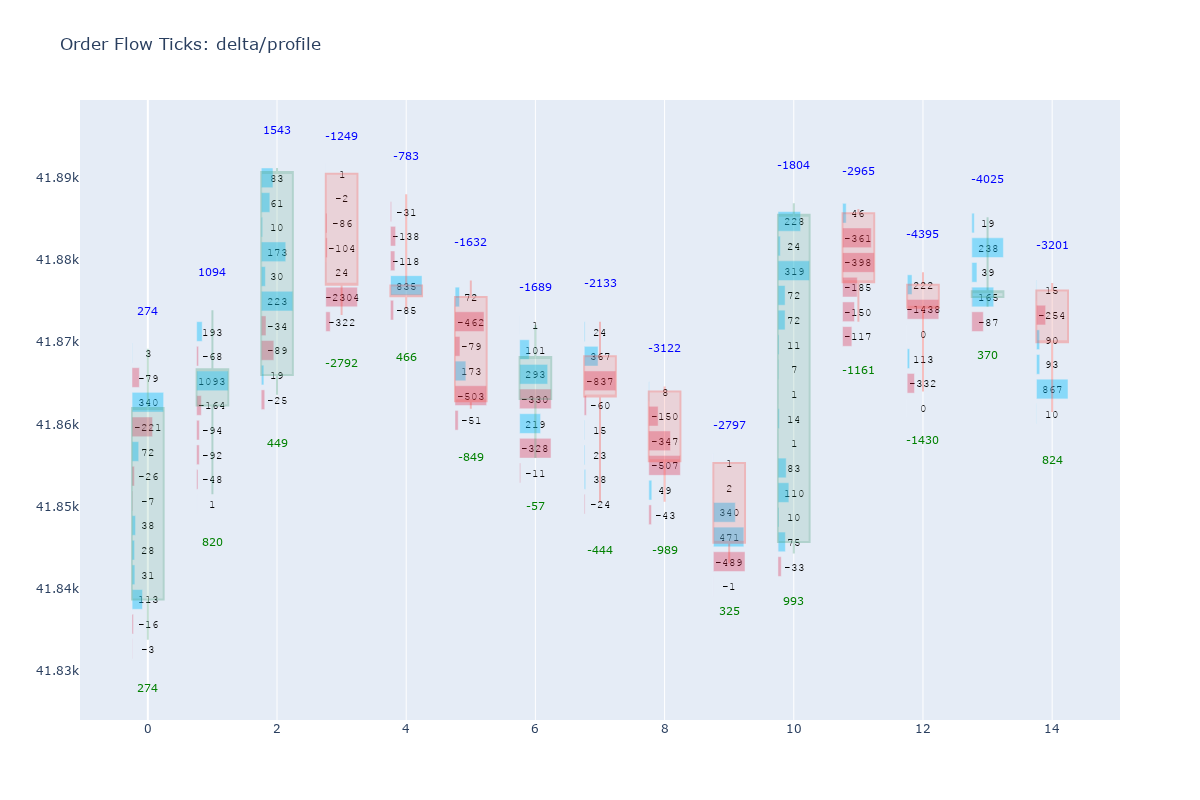

In [5]:
odft.plot(iloc_value=15, chart='candle', renderer=renderer)

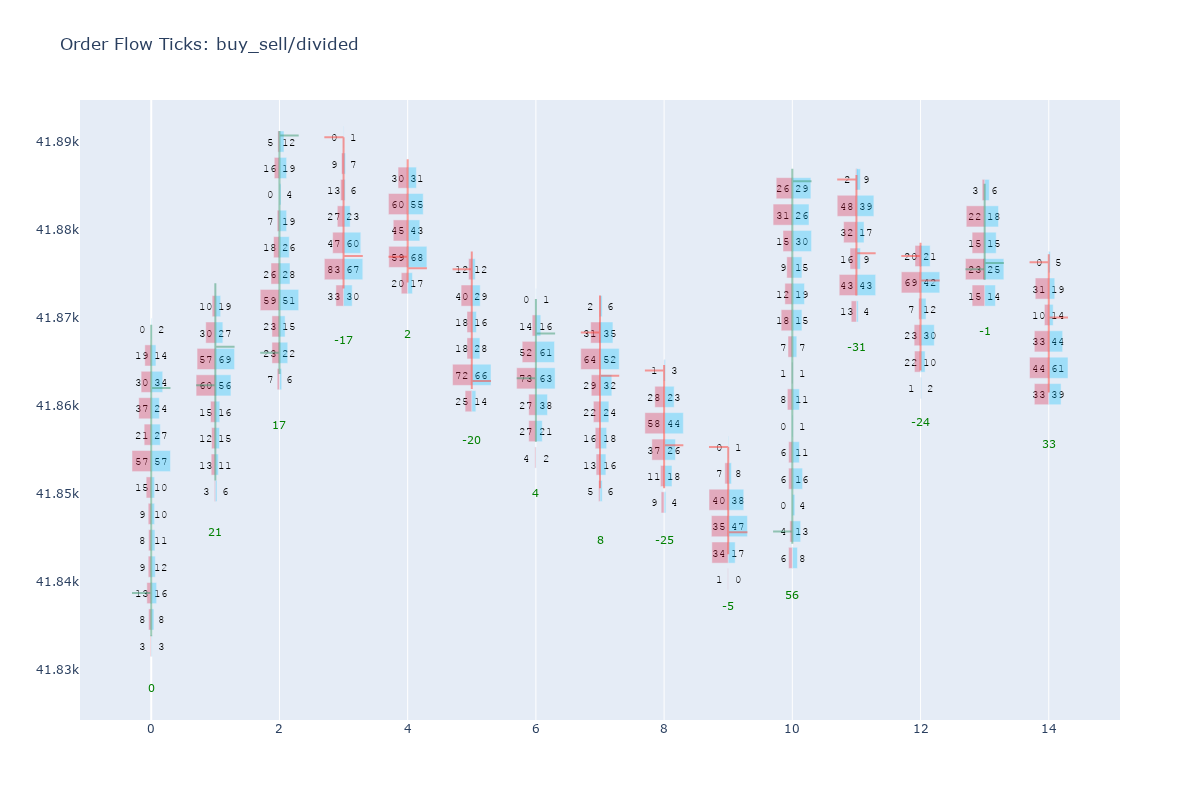

In [6]:
odft.plot(mode='buy_sell', view='divided', chart='ohlc', renderer=renderer)

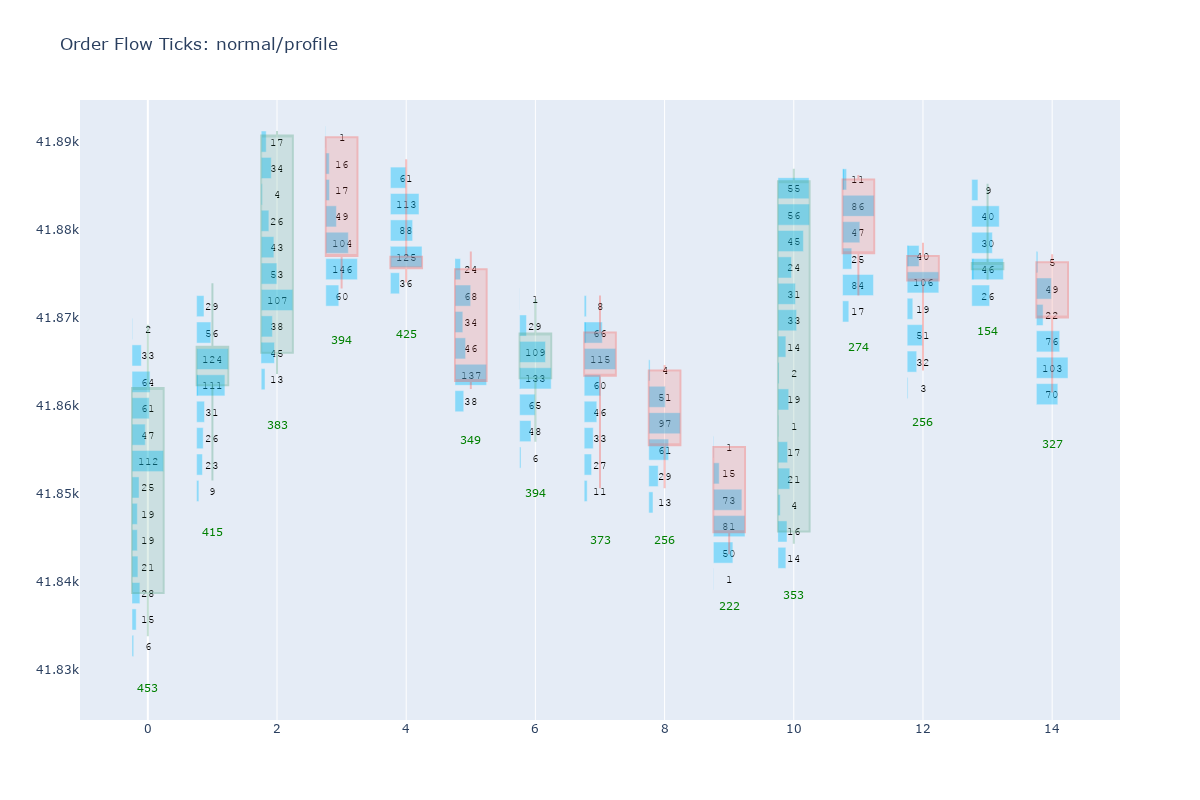

In [7]:
odft.plot(mode='normal', chart='candle', renderer=renderer)

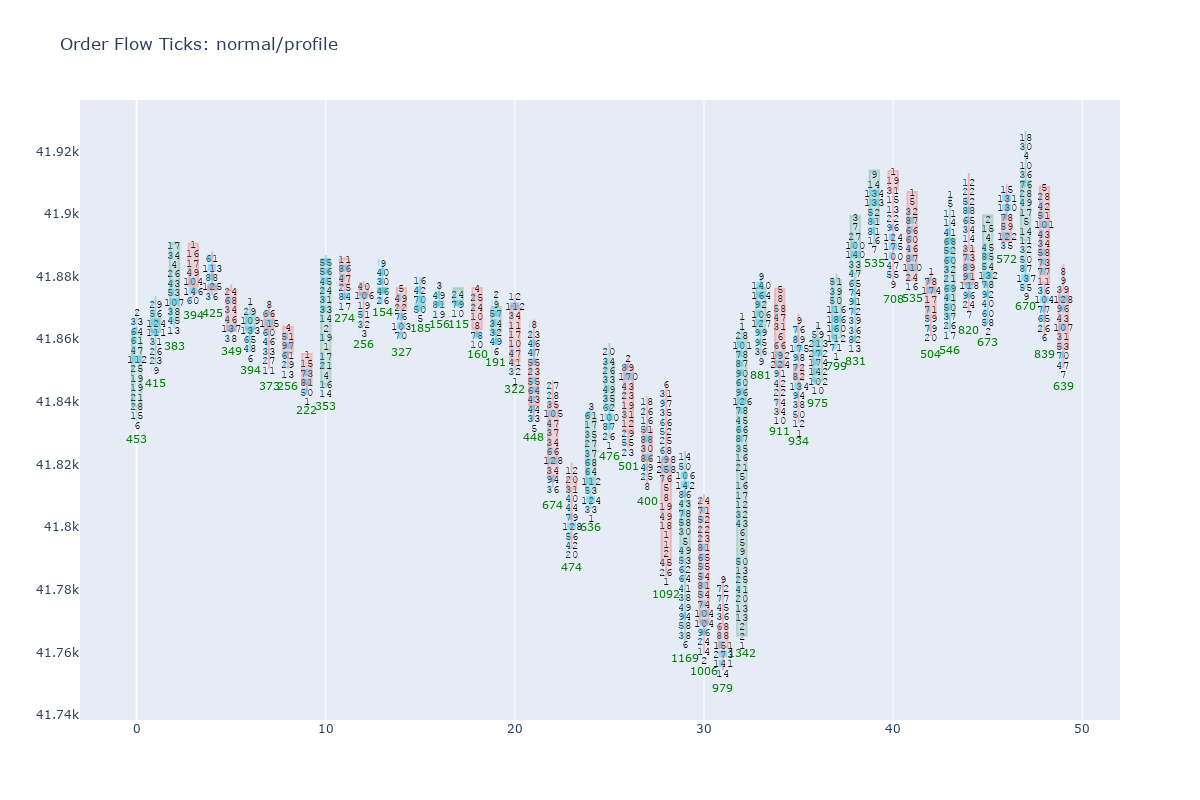

In [8]:
odft.plot(iloc_value=50, mode='normal', chart='candle', renderer=renderer)